In [7]:
#connect to s3 with the sdk
from boto.s3.connection import S3Connection
from PIL import Image 
import webbrowser
import datetime
from boto.s3.key import Key
import boto3

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
client = boto3.client('rekognition' , 'us-east-1')
%matplotlib inline

#You must change these to your own password and bucket information.
conn = S3Connection()

from matplotlib.pyplot import imshow
import json
from pprint import pprint

%matplotlib inline
import matplotlib
matplotlib.rc("savefig", dpi=100)
import cv2
from collections import namedtuple

#only run this once or you will freeze and have to restart the notebook server
#to get this working properly, you'll need to change the 'conn = ' line in mxnet_mtcnn_face_detection
##from mxnet_mtcnn_face_detection.main_rekognition_filter import getdetector
##from mxnet_mtcnn_face_detection.main_rekognition_filter import countfaces
#change this to the location of your model folder
##detector=getdetector('mxnet_mtcnn_face_detection/model')

print ('done')

done


In [41]:
#print the bucket name and contents
mybuckets = conn.get_all_buckets()
print(len(mybuckets))

print ('print info about this bucket')
#this bucket is read-public, so feel free to follow this example code without changing 
#anything besides public/private key
bucketname='fishbucketads'
s3bucket = conn.get_bucket(bucketname)
print(s3bucket)
size = 0
count = 0
for key in s3bucket.list():
    size += key.size
    count += 1
 
print ("%.3f GB" % (size*1.0/1024/1024/1024))
print ("num files: "+str(count))

for key in s3bucket.list():
        print ("{name}\t{size}\t{modified}".format(
                name = key.name,
                size = key.size,
                modified = key.last_modified,
                ))

2
print info about this bucket
<Bucket: fishbucketads>
0.000 GB
num files: 6
pic1.jpg	15940	2017-09-20T02:05:58.000Z
pic2.jpg	8135	2017-09-20T02:05:58.000Z
pic3.jpg	13412	2017-09-20T02:05:58.000Z
pic4.jpg	9701	2017-09-20T02:05:59.000Z
pic5.jpg	8521	2017-09-20T02:05:59.000Z
pic6.jpg	10280	2017-09-20T02:05:59.000Z


In [43]:
#a demo of looping over a s3 bucket. printing out the MTCNN and the num_faces 
#from rekognition's api. Looking at printed output gives interesting results about errors
#coming from both sides. Errors are few though, and are usually worth taking in exchange
#for the cost savings
import commands
count=0
failcount=0
picslabels=0
picswolabels=0
        
for key in s3bucket.list():
    #use this line to control how many loops
    if count==50:
        break
    count += 1
    if ((count % 100) == 0):
        print ('at count: '+str(count)+'\n')
        
    print(key.name)
    try:
        
        response = client.detect_labels(
            Image={
                'S3Object': {
                #marinus will need to change the bucket name to whichever they want to use
                'Bucket': bucketname,
                'Name': key.name
                #,'Version': '1'
            }
        }
        )
        
        #version 1: get ground truth from rekognition api


        print(response['Labels'])
     

        num_api_labels=len(response['Labels'])
        print('Rekognition labels detected count: '+str(num_api_labels))
 
        
        #keep track of success/fail ratio
        if (num_api_labels>0):
                print('pics w labels')
                picslabels+=1
        else:
                print('pics wo labels')
                picswolabels+=1
        
        print('')
        
    except:
        print ('failed on: '+key.name)
        print('')
        failcount=(failcount+1)
        
        

print('Pictures with Labels '+str(picslabels))
print('Pictures without Labels '+str(picswolabels))
print('fail count '+str(failcount))
print('total number of photos processed '+str(picslabels+picswolabels+failcount))

pic1.jpg
[{u'Confidence': 96.99449920654297, u'Name': u'Automobile'}, {u'Confidence': 96.99449920654297, u'Name': u'Car'}, {u'Confidence': 96.99449920654297, u'Name': u'Vehicle'}, {u'Confidence': 64.52657318115234, u'Name': u'Marching'}, {u'Confidence': 64.52657318115234, u'Name': u'Parade'}, {u'Confidence': 61.73340606689453, u'Name': u'Military'}, {u'Confidence': 56.56981658935547, u'Name': u'Carnival'}, {u'Confidence': 56.56981658935547, u'Name': u'Crowd'}, {u'Confidence': 56.56981658935547, u'Name': u'Festival'}, {u'Confidence': 51.102657318115234, u'Name': u'Road'}, {u'Confidence': 51.102657318115234, u'Name': u'Street'}, {u'Confidence': 51.102657318115234, u'Name': u'Town'}]
Rekognition labels detected count: 12
pics w labels

pic2.jpg
[{u'Confidence': 99.33028411865234, u'Name': u'Chess'}, {u'Confidence': 99.33028411865234, u'Name': u'Game'}]
Rekognition labels detected count: 2
pics w labels

pic3.jpg
[{u'Confidence': 89.60016632080078, u'Name': u'Building'}, {u'Confidence': 89

pic1.jpg


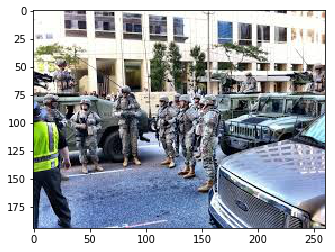

In [47]:
#retrieve and print a selected image
image='pic1.jpg'.replace('+',' ')
print (image)
#make sure that you have the folder path in whatever instance is running this code
folder='/home/ubuntu/ADS_Class/myrepo/'
temp_image=folder+'temp_image.png'

key = s3bucket.get_key(image)
#use the same file name for each temp image or you will start getting a ton of photos 
#stored in the folder
#also, if you are using your own bucket, you may need to tweak this code to handle '/'s
key.get_contents_to_filename(temp_image)                                                                  
pil_im = Image.open(temp_image, 'r')
imshow(np.asarray(pil_im))